In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.220 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (NVIDIA L4, 22693MiB)
Setup complete ✅ (12 CPUs, 53.0 GB RAM, 40.4/235.7 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!pip install ultralytics opencv-python matplotlib seaborn

import cv2
import torch
from ultralytics import YOLO
import matplotlib.pyplot as plt
import seaborn as sns

# Model 1

Epochs = 10 |
Image_Size = 640px |
Lerning Rate = Default | Batch Size = Default

In [ ]:
!yolo task=detect mode=train model=yolo12s.pt data=/content/License-Plate-Recognition-11/data.yaml epochs=10 imgsz=640 plots=True project='license_plate_runs' name='V1'

Ultralytics 8.3.220 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (NVIDIA L4, 22693MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/License-Plate-Recognition-11/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo12s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=V1, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, p

--- Best Performance Metrics Across All Epochs ---
Best Precision: 0.8809
Best Recall: 0.8008
Best F1-Score: 0.8389
Best mAP@50(Accuracy): 0.8499
-------------------------------------------------


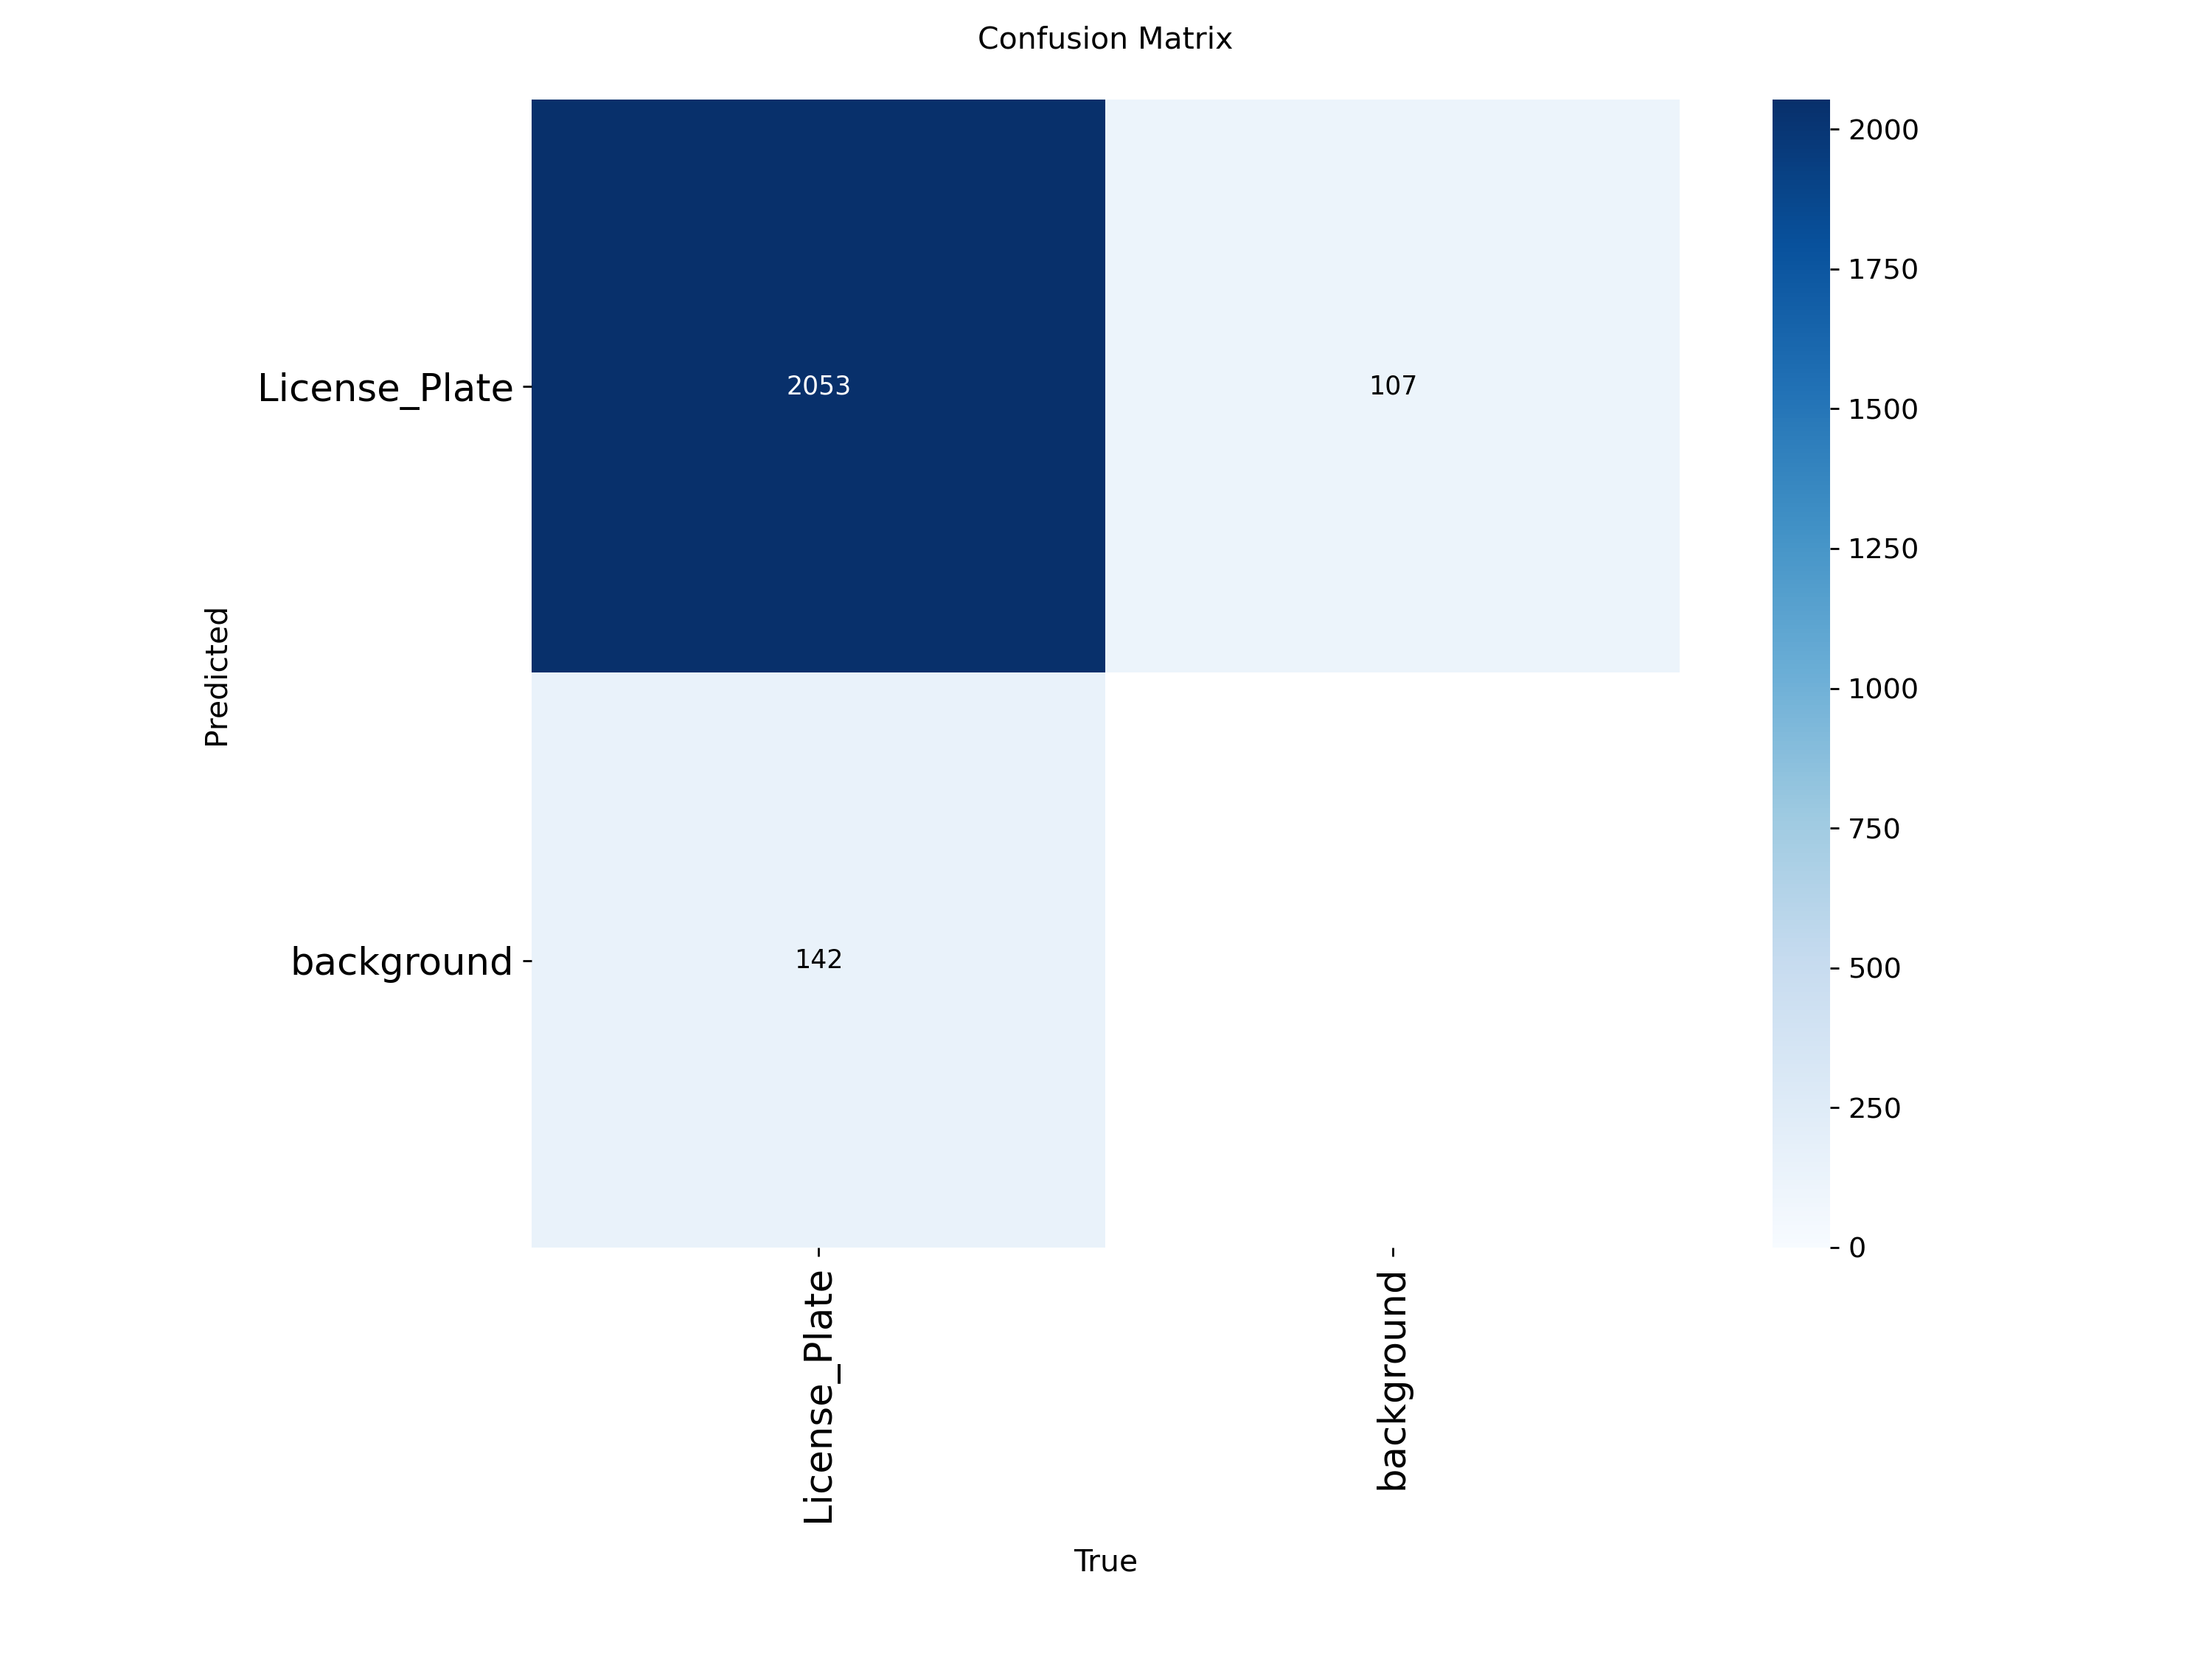

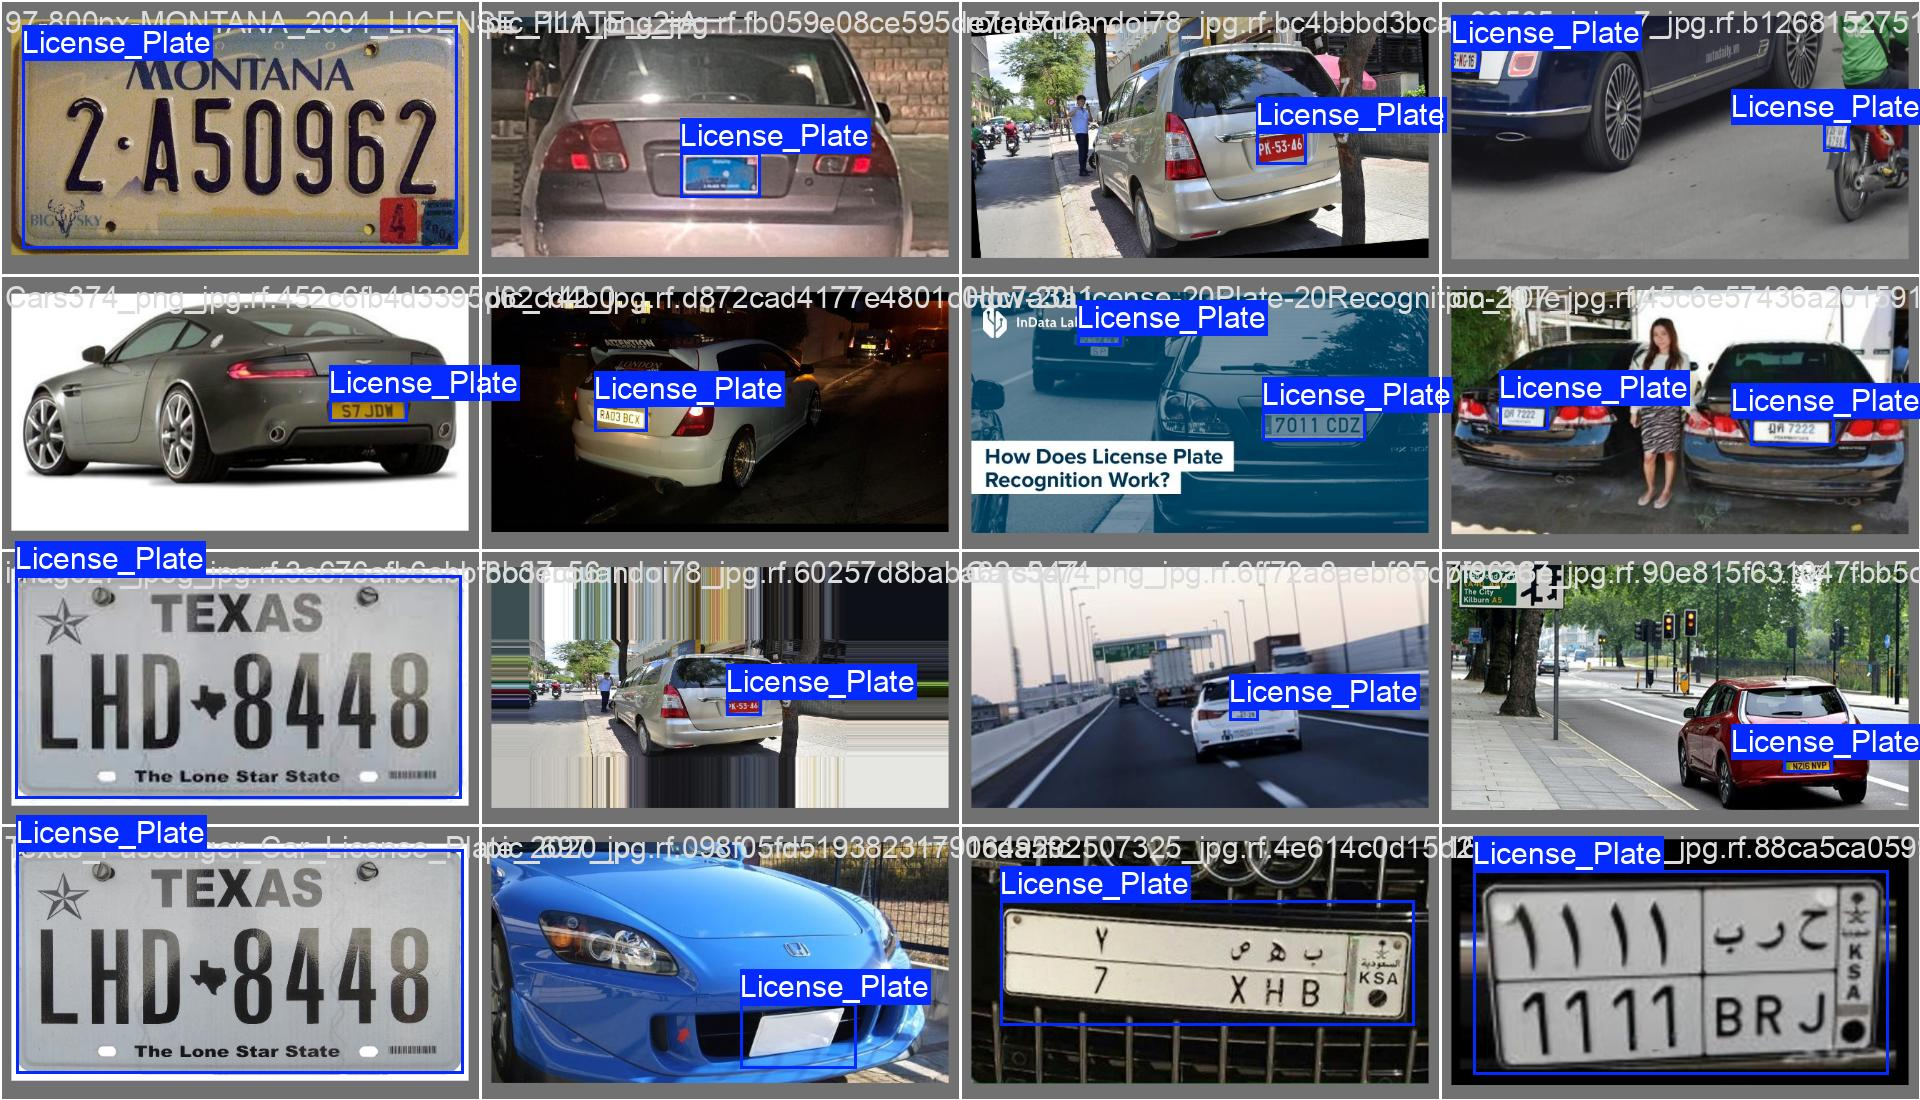

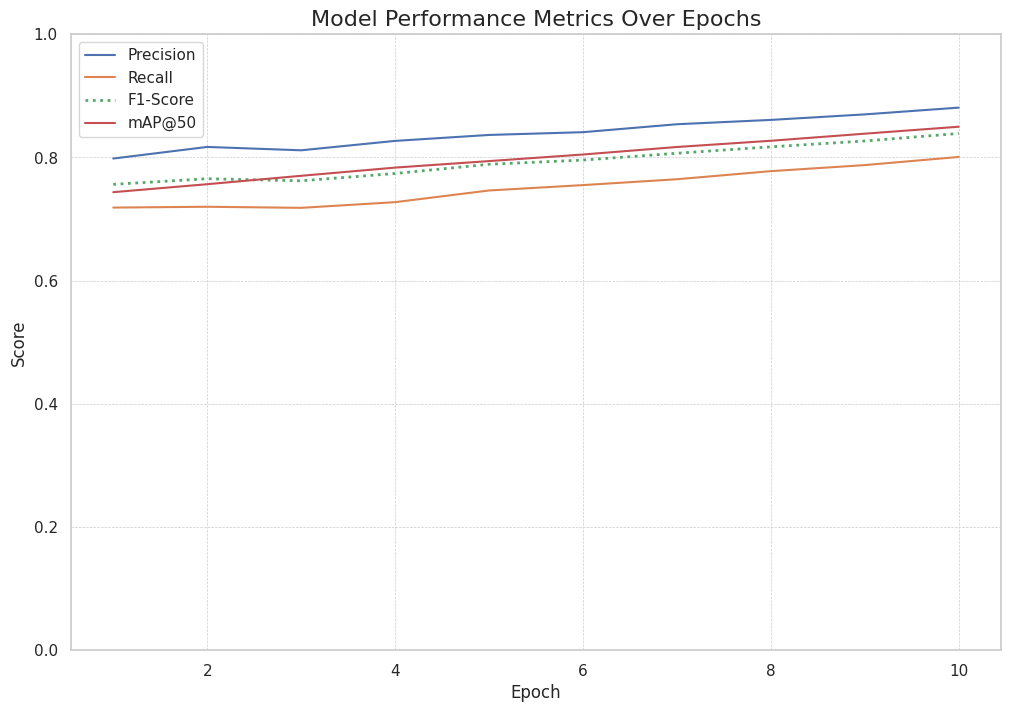

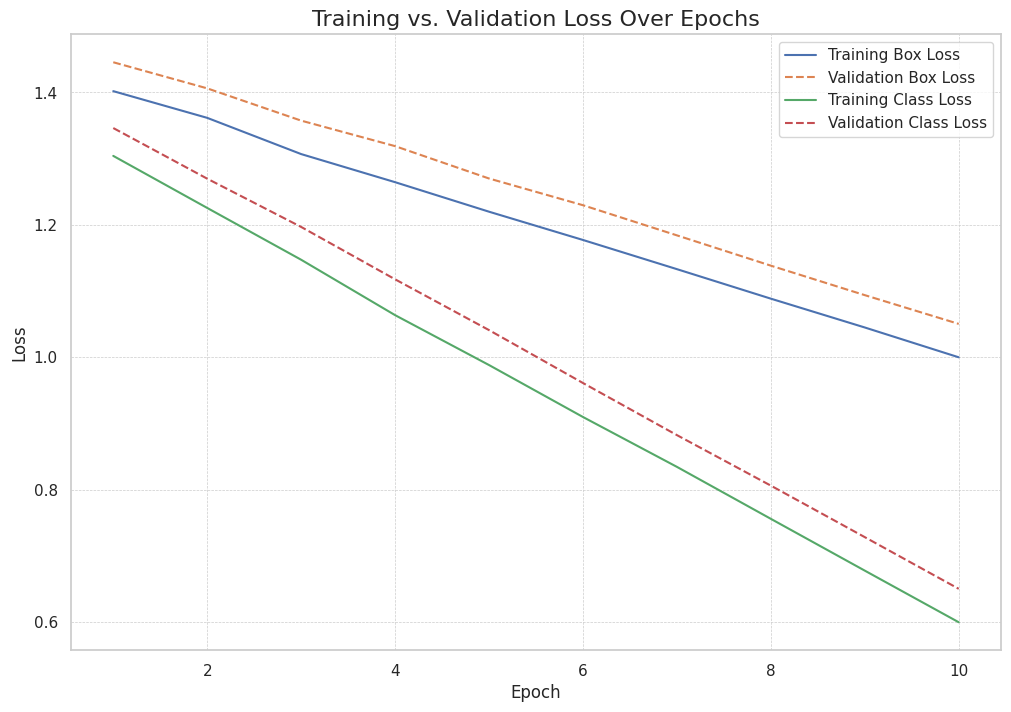

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(style="whitegrid")

df = pd.read_csv('/content/license_plate_runs/V1/results.csv')
df.columns = df.columns.str.strip()

precision = df['metrics/precision(B)']
recall = df['metrics/recall(B)']
df['metrics/f1_score'] = 2 * (precision * recall) / (precision + recall).replace(0, np.nan)


best_metrics = {
    'Precision': df['metrics/precision(B)'].max(),
    'Recall': df['metrics/recall(B)'].max(),
    'F1-Score': df['metrics/f1_score'].max(),
    'mAP@50(Accuracy)': df['metrics/mAP50(B)'].max(),
}

print("--- Best Performance Metrics Across All Epochs ---")
for metric, value in best_metrics.items():
    print(f"Best {metric}: {value:.4f}")
print("-------------------------------------------------")

#(Precision, Recall, mAP, F1)
plt.figure(figsize=(12, 8))
plt.plot(df['epoch'], df['metrics/precision(B)'], label='Precision')
plt.plot(df['epoch'], df['metrics/recall(B)'], label='Recall')
plt.plot(df['epoch'], df['metrics/f1_score'], label='F1-Score', linestyle=':', linewidth=2)
plt.plot(df['epoch'], df['metrics/mAP50(B)'], label='mAP@50')

plt.title('Model Performance Metrics Over Epochs', fontsize=16)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.ylim(0, 1)
plt.savefig('performance_metrics_with_f1.png')


#Training vs. Validation Loss
plt.figure(figsize=(12, 8))

plt.plot(df['epoch'], df['train/box_loss'], label='Training Box Loss')
plt.plot(df['epoch'], df['val/box_loss'], label='Validation Box Loss', linestyle='--')

plt.plot(df['epoch'], df['train/cls_loss'], label='Training Class Loss')
plt.plot(df['epoch'], df['val/cls_loss'], label='Validation Class Loss', linestyle='--')


plt.title('Training vs. Validation Loss Over Epochs', fontsize=16)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.savefig('training_validation_loss.png')

display(Image('/content/license_plate_runs/V1/confusion_matrix.png'))
display(Image('/content/license_plate_runs/V1/val_batch1_labels.jpg'))

# Model 2

Epochs = 20 |
Image_Size = 640px |
Lerning Rate = 0.001 | Batch Size = 16




In [ ]:
!yolo task=detect mode=train model=yolo12s.pt data=/content/License-Plate-Recognition-11/data.yaml epochs=20 batch=16 imgsz=640 lr0=0.001 plots=True project='license_plate_runs' name='V2'

Ultralytics 8.3.220 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (NVIDIA L4, 22693MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/License-Plate-Recognition-11/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo12s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=V2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, 

--- Best Performance Metrics Across All Epochs ---
Best Precision: 0.9297
Best Recall: 0.8501
Best F1-Score: 0.8881
Best mAP@50(Accuracy): 0.8998
-------------------------------------------------


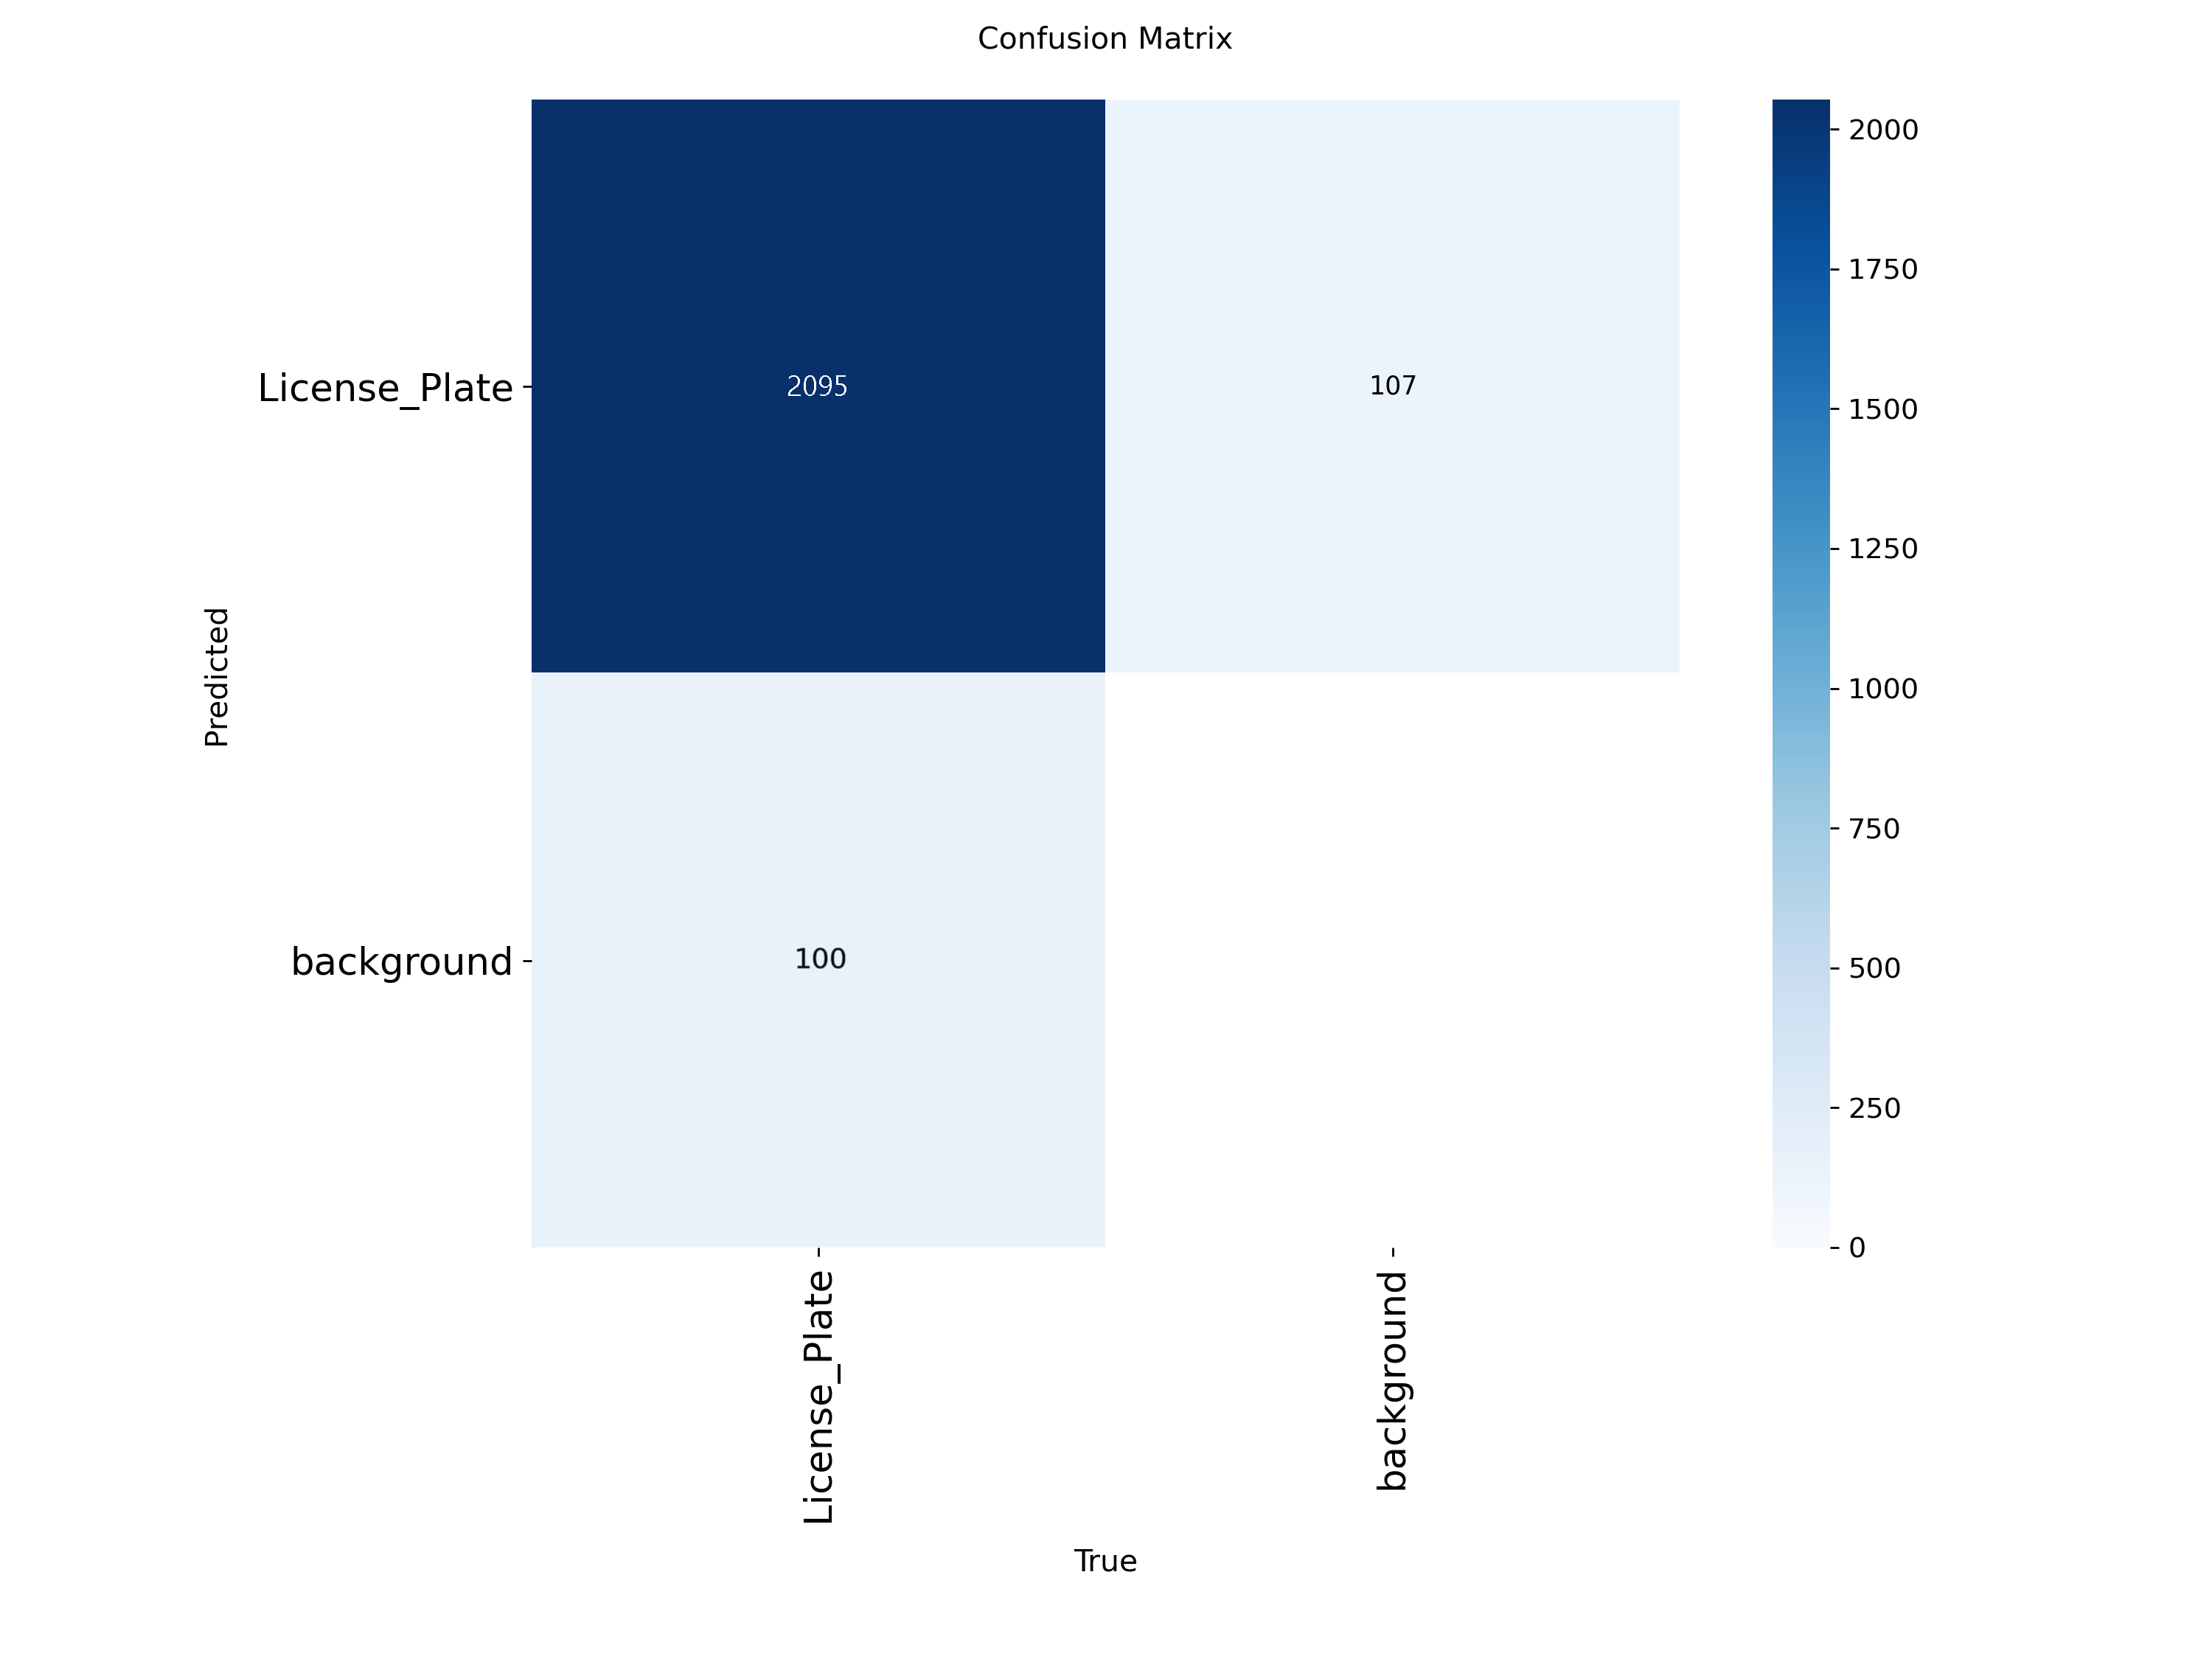

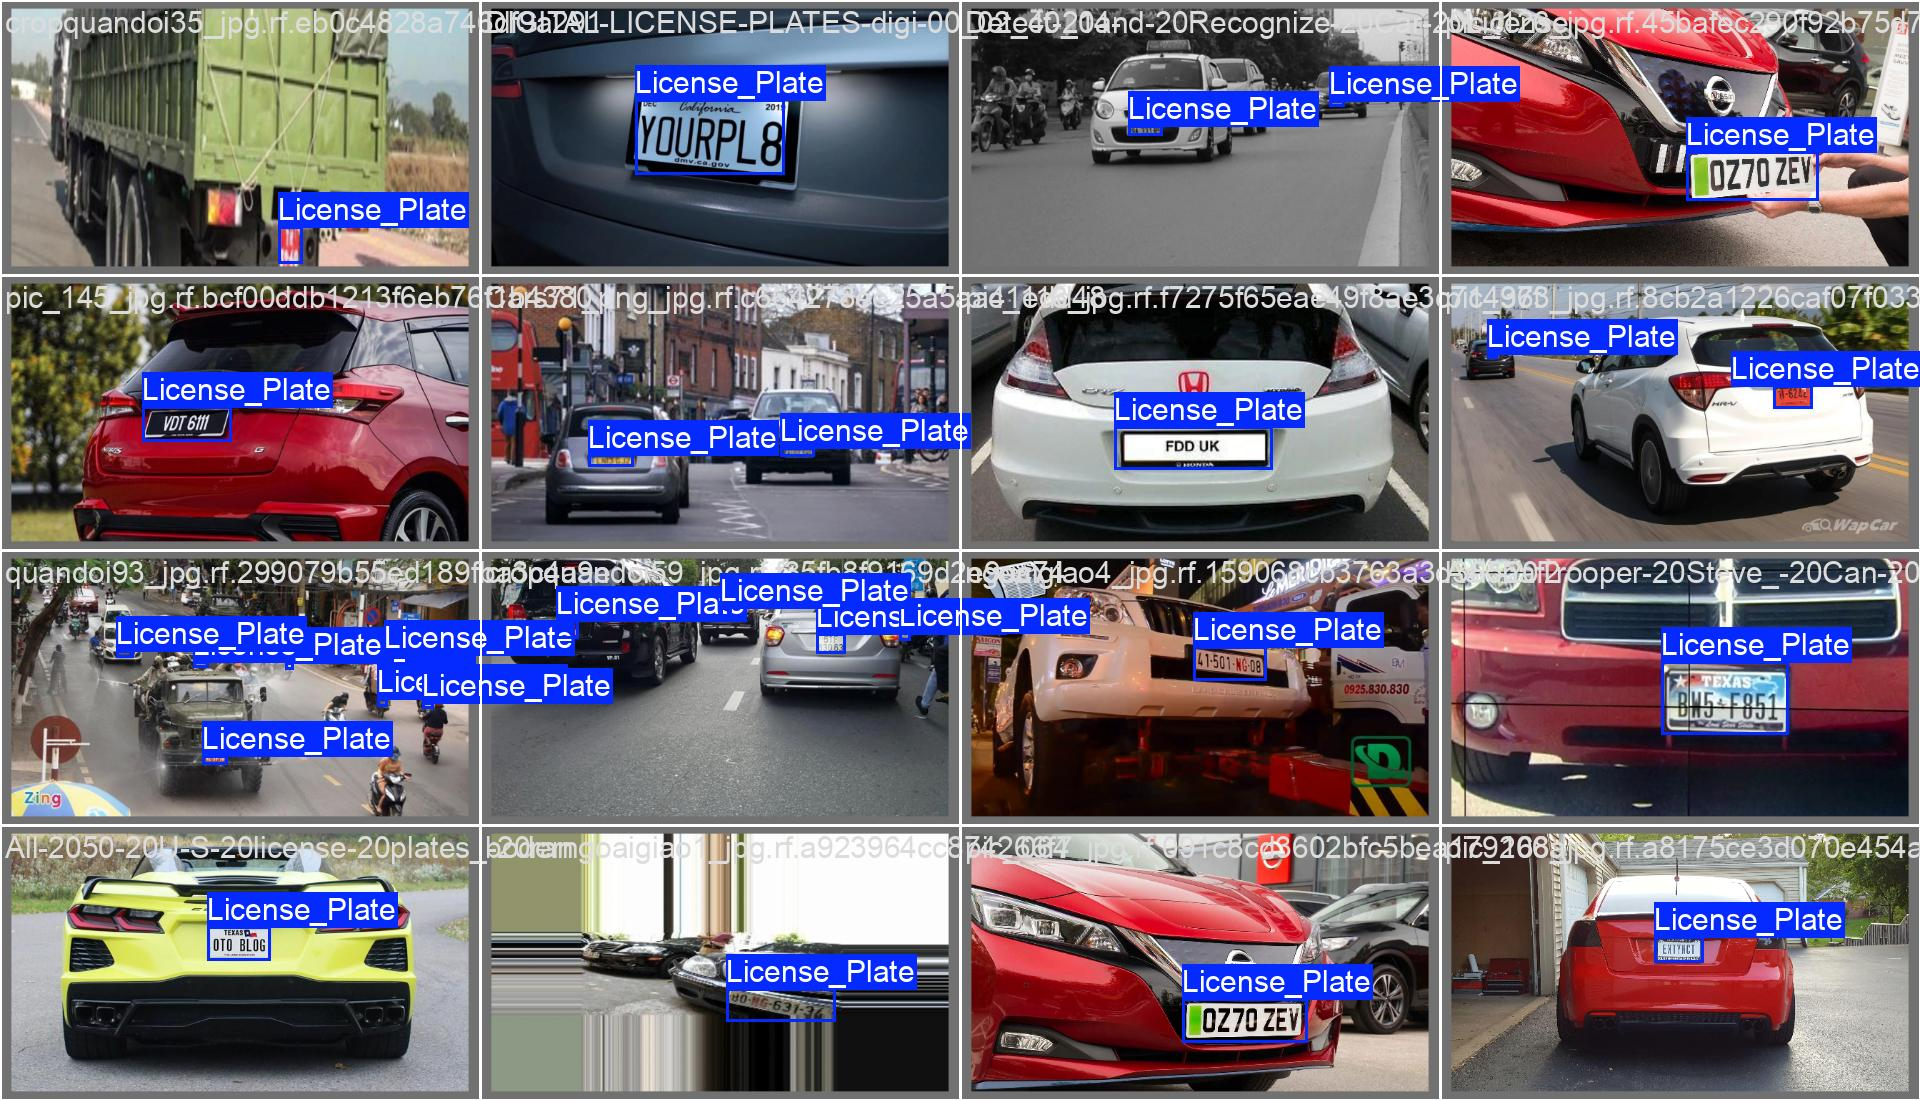

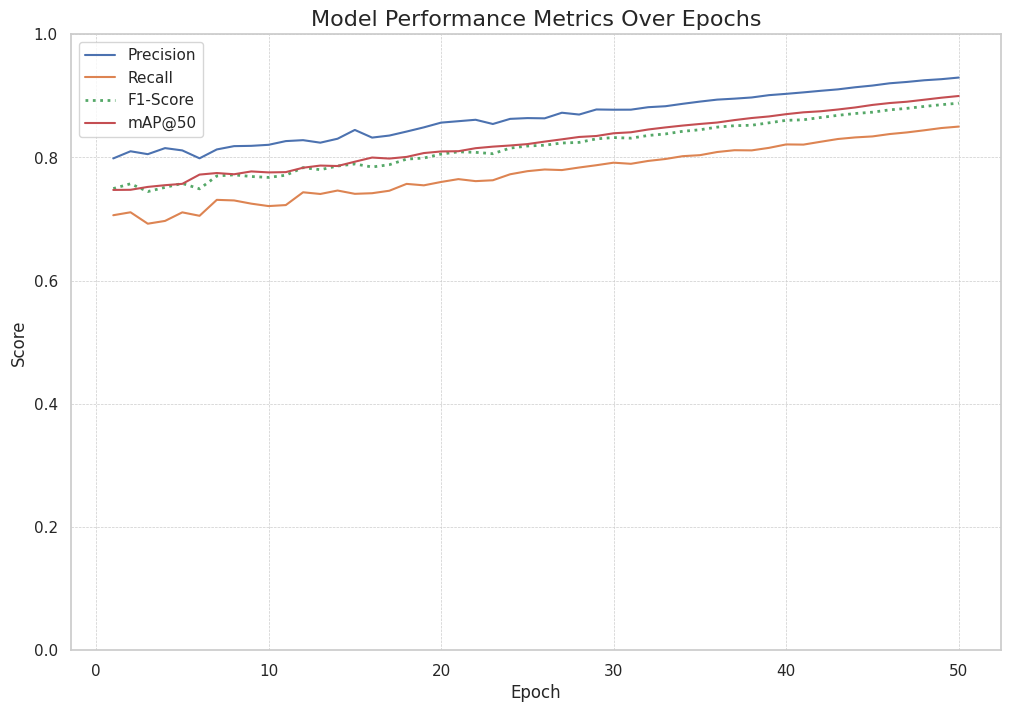

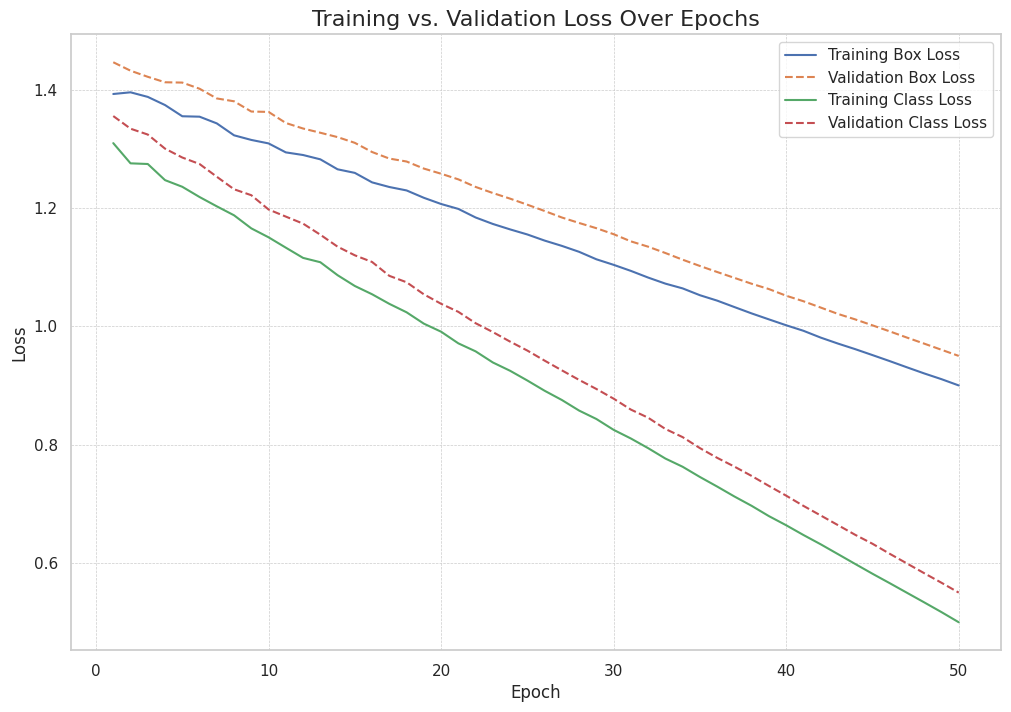

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(style="whitegrid")

df = pd.read_csv('/content/license_plate_runs/V2/results.csv')
df.columns = df.columns.str.strip()

precision = df['metrics/precision(B)']
recall = df['metrics/recall(B)']
df['metrics/f1_score'] = 2 * (precision * recall) / (precision + recall).replace(0, np.nan)


best_metrics = {
    'Precision': df['metrics/precision(B)'].max(),
    'Recall': df['metrics/recall(B)'].max(),
    'F1-Score': df['metrics/f1_score'].max(),
    'mAP@50(Accuracy)': df['metrics/mAP50(B)'].max(),
}

print("--- Best Performance Metrics Across All Epochs ---")
for metric, value in best_metrics.items():
    print(f"Best {metric}: {value:.4f}")
print("-------------------------------------------------")

#(Precision, Recall, mAP, F1)
plt.figure(figsize=(12, 8))
plt.plot(df['epoch'], df['metrics/precision(B)'], label='Precision')
plt.plot(df['epoch'], df['metrics/recall(B)'], label='Recall')
plt.plot(df['epoch'], df['metrics/f1_score'], label='F1-Score', linestyle=':', linewidth=2)
plt.plot(df['epoch'], df['metrics/mAP50(B)'], label='mAP@50')

plt.title('Model Performance Metrics Over Epochs', fontsize=16)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.ylim(0, 1)
plt.savefig('performance_metrics_with_f1.png')


#Training vs. Validation Loss
plt.figure(figsize=(12, 8))

plt.plot(df['epoch'], df['train/box_loss'], label='Training Box Loss')
plt.plot(df['epoch'], df['val/box_loss'], label='Validation Box Loss', linestyle='--')

plt.plot(df['epoch'], df['train/cls_loss'], label='Training Class Loss')
plt.plot(df['epoch'], df['val/cls_loss'], label='Validation Class Loss', linestyle='--')


plt.title('Training vs. Validation Loss Over Epochs', fontsize=16)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.savefig('training_validation_loss.png')

display(Image('/content/license_plate_runs/V2/confusion_matrix.png'))
display(Image('/content/license_plate_runs/V2/val_batch1_labels.jpg'))

# Model 3

Epochs = 50 |
Image_Size = 740px |
Lerning Rate = 0.001 | Batch Size = 16




In [ ]:
!yolo task=detect mode=train model=yolo12s.pt data=/content/License-Plate-Recognition-11/data.yaml batch=16 epochs=50 imgsz=740 lr0=0.001 plots=True project='license_plate_runs' name='V2'

Ultralytics 8.3.220 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (NVIDIA L4, 22693MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/License-Plate-Recognition-11/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=740, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo12s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=V2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, 

--- Best Performance Metrics Across All Epochs ---
Best Precision: 0.9796
Best Recall: 0.9504
Best F1-Score: 0.9648
Best mAP@50(Accuracy): 0.9704
-------------------------------------------------


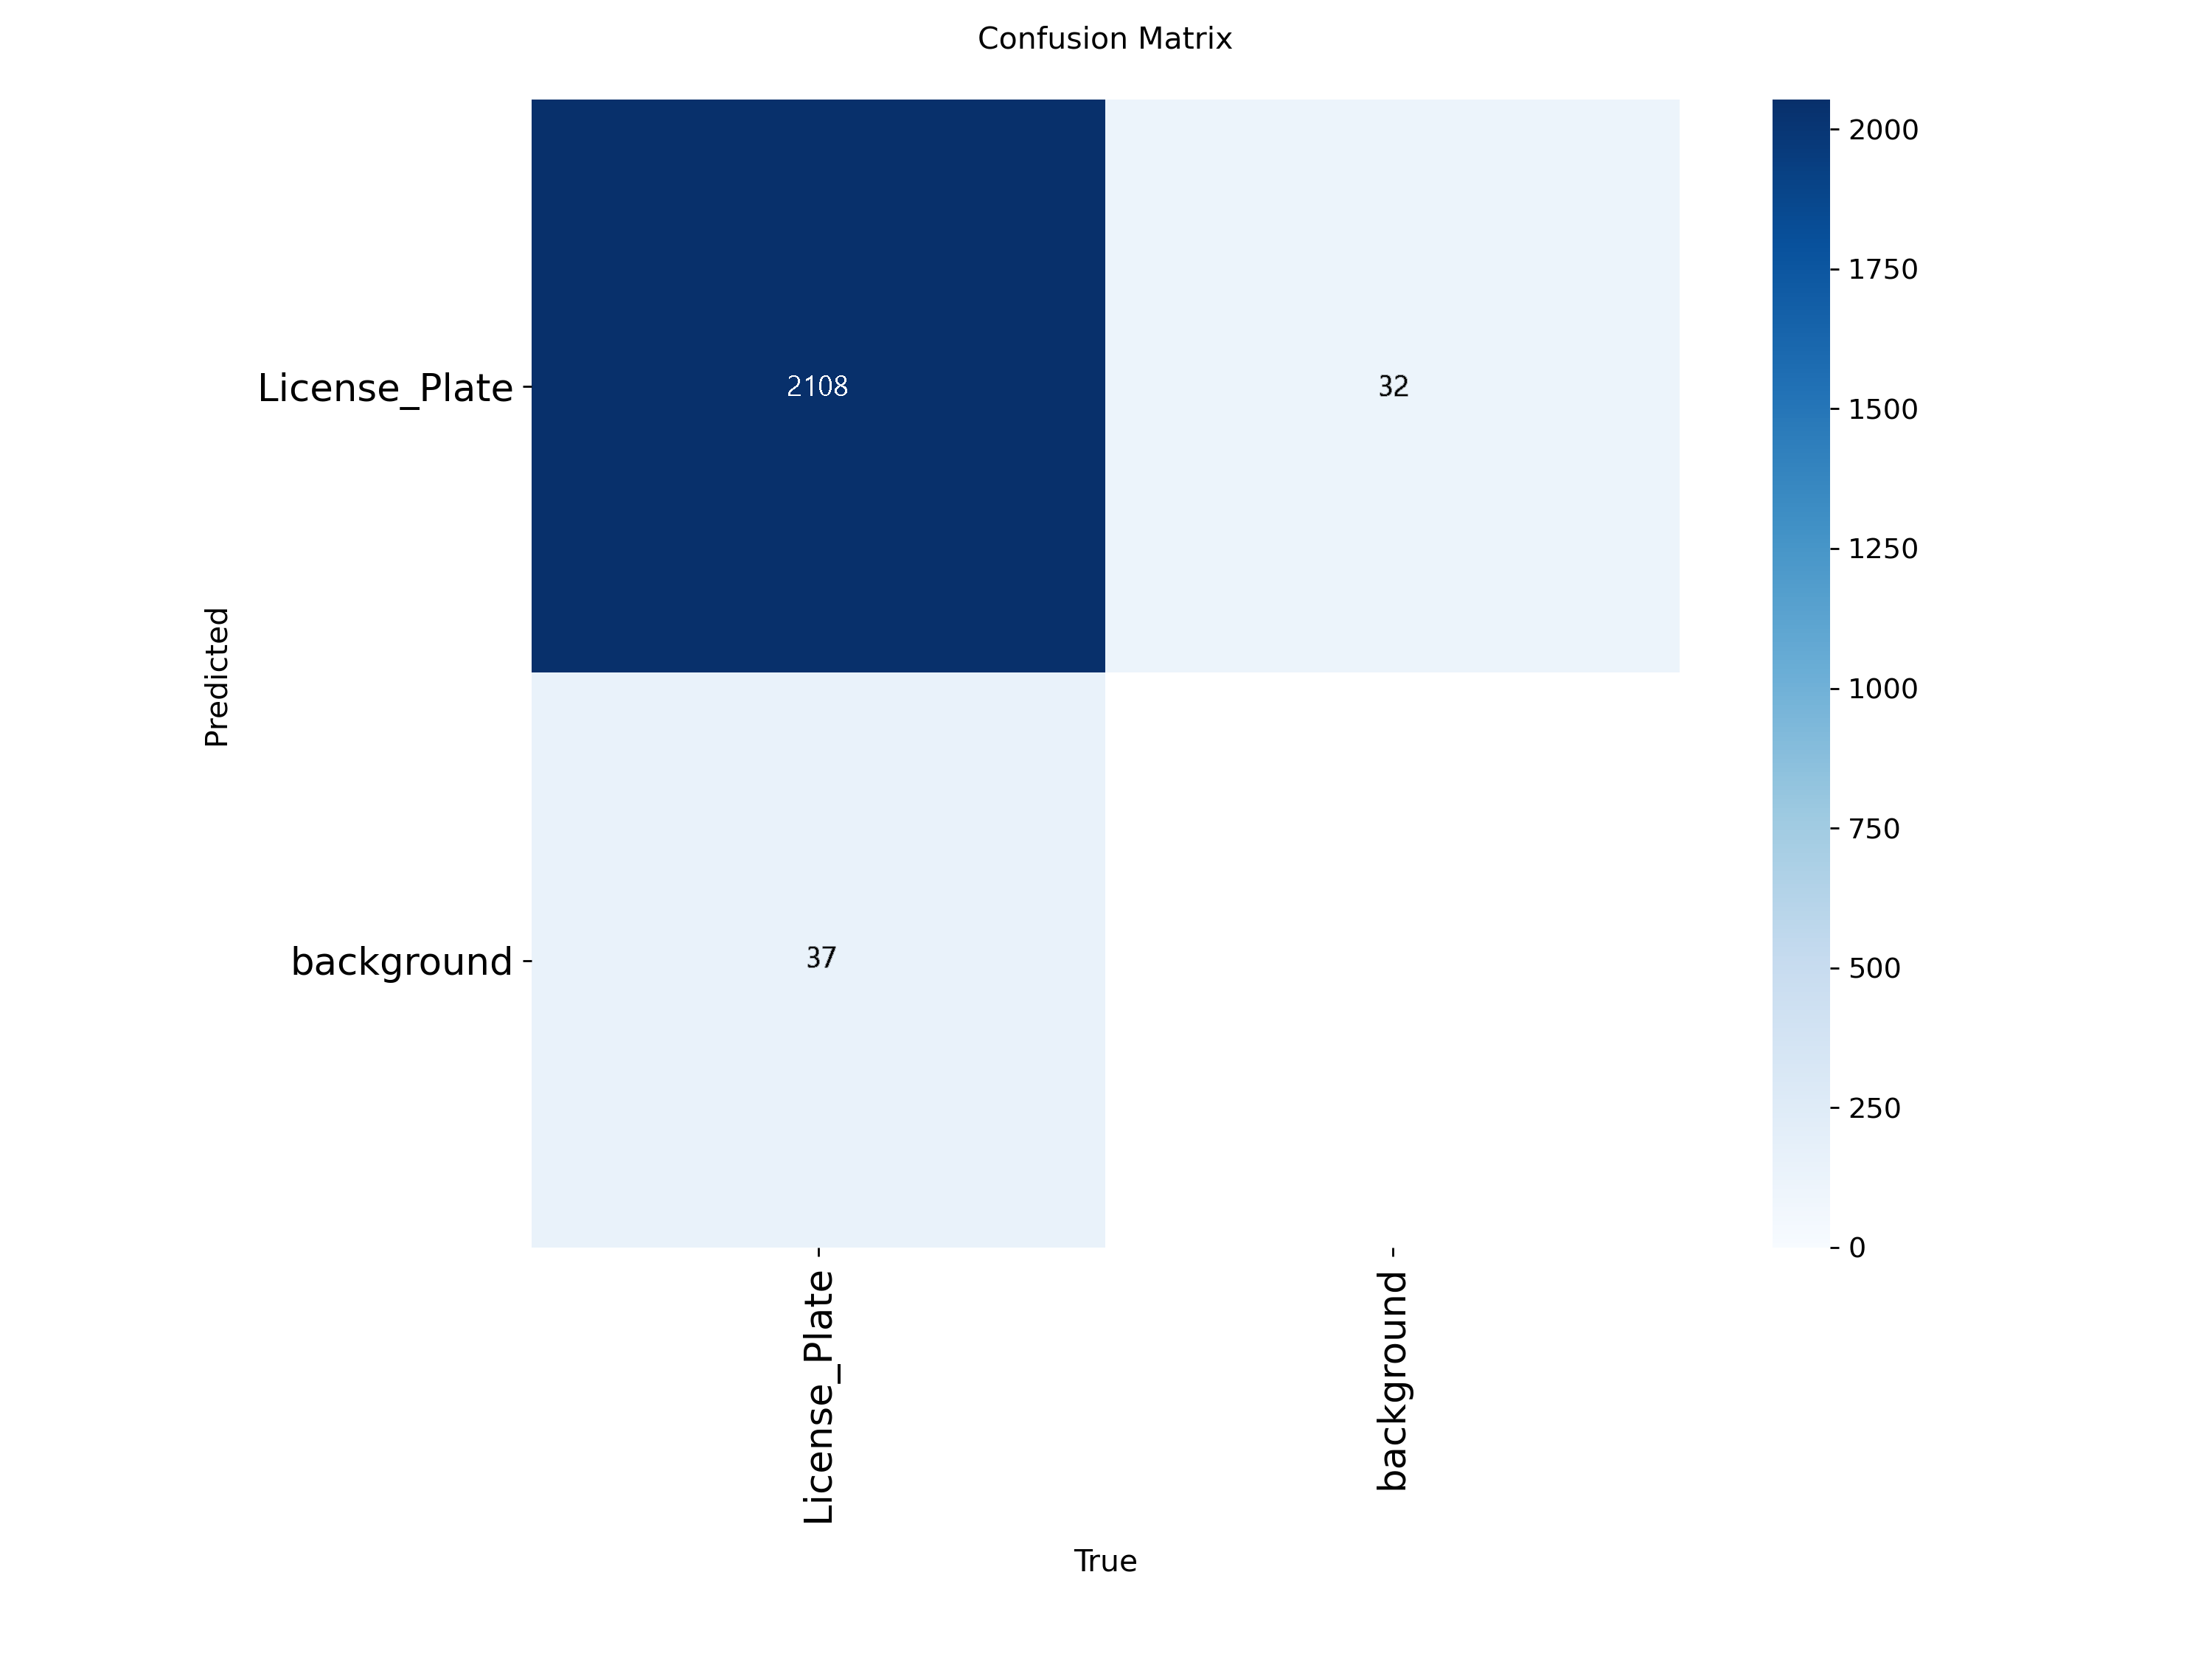

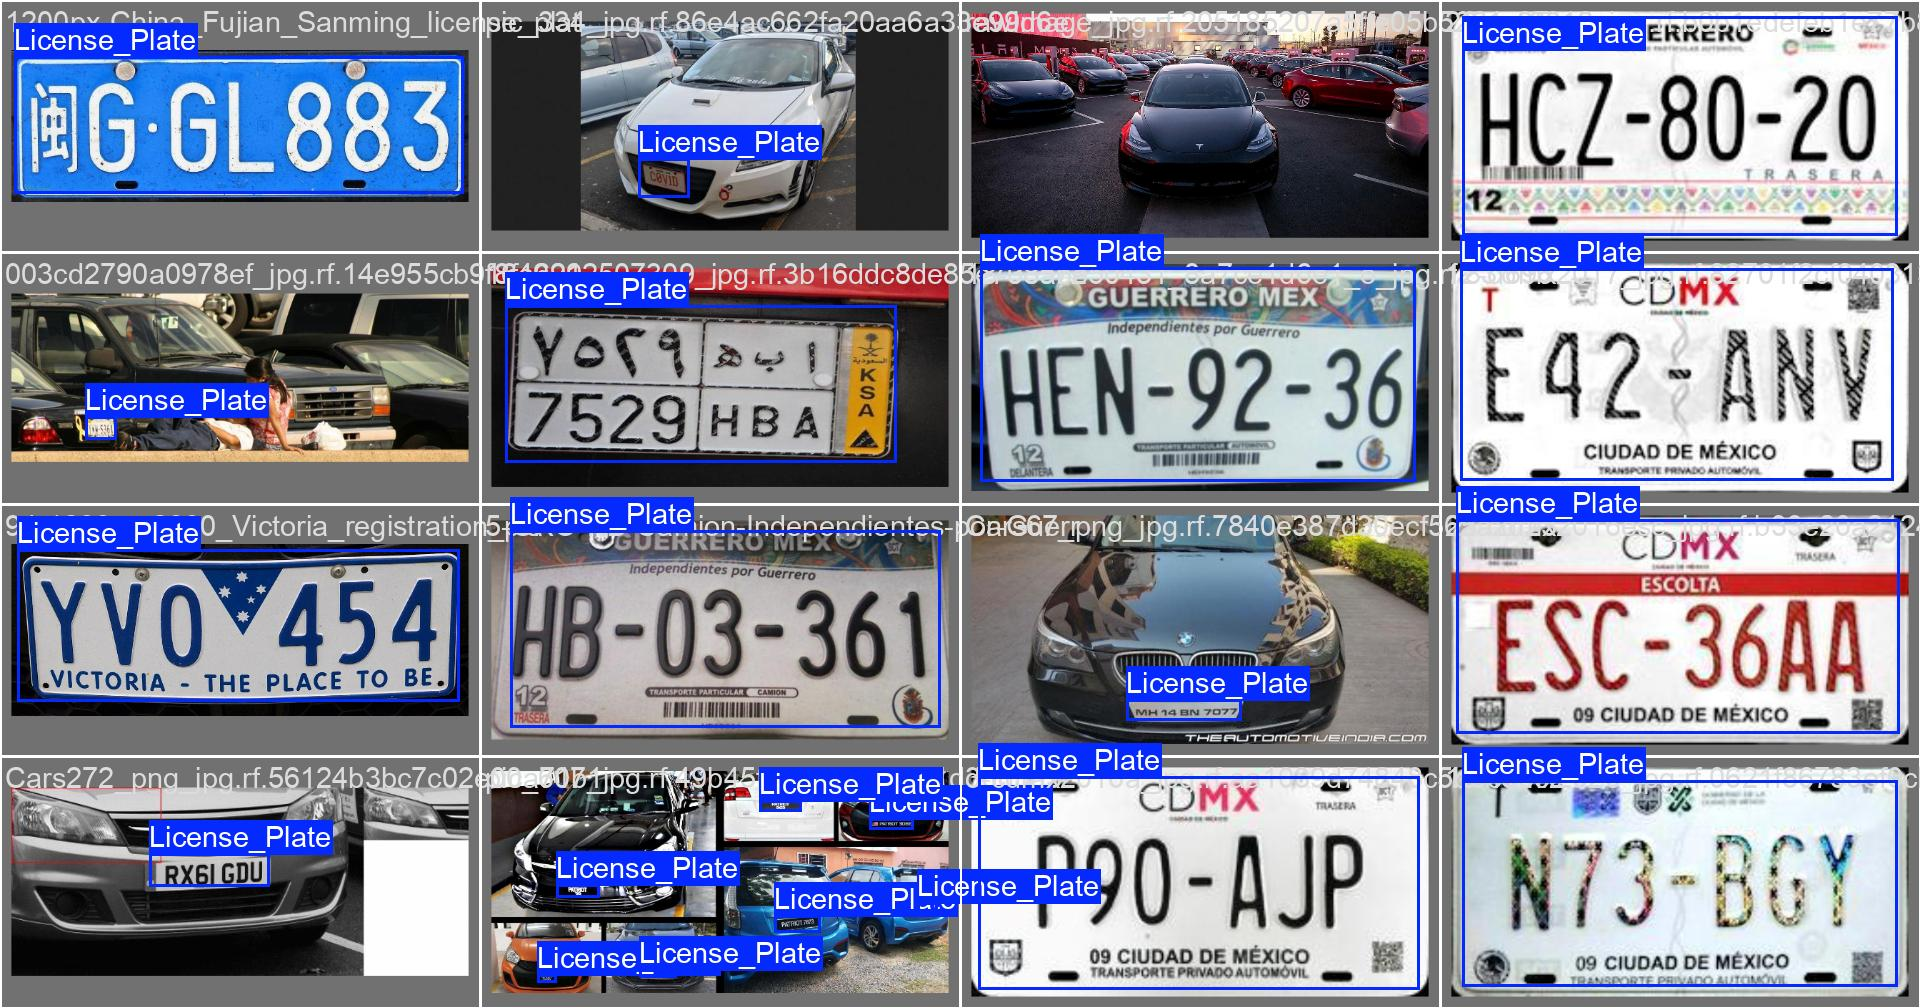

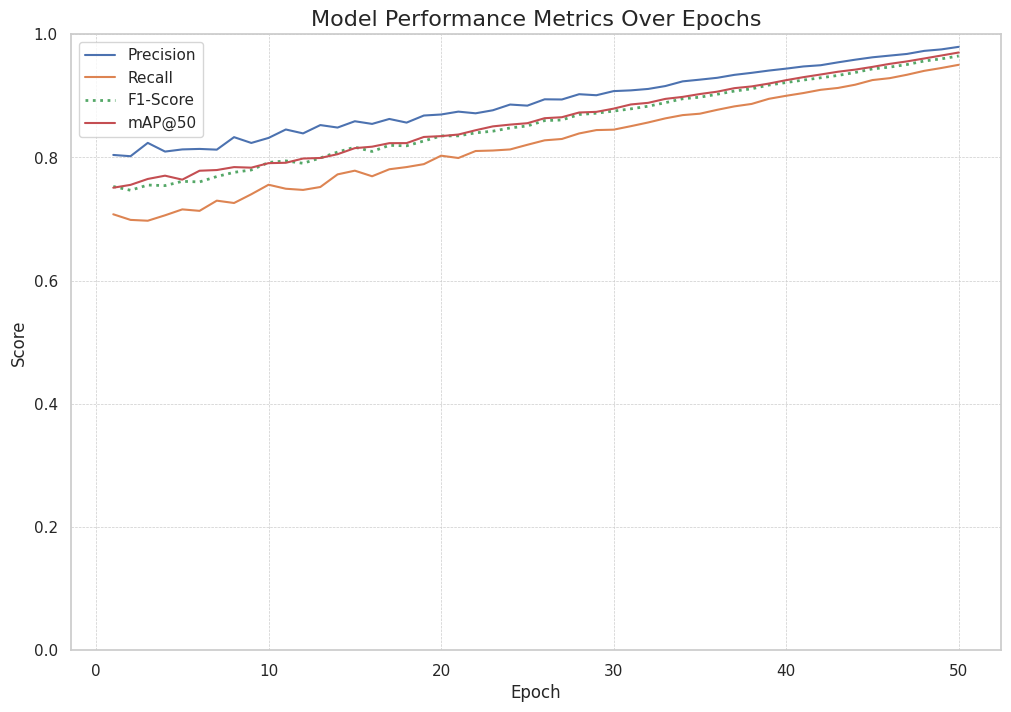

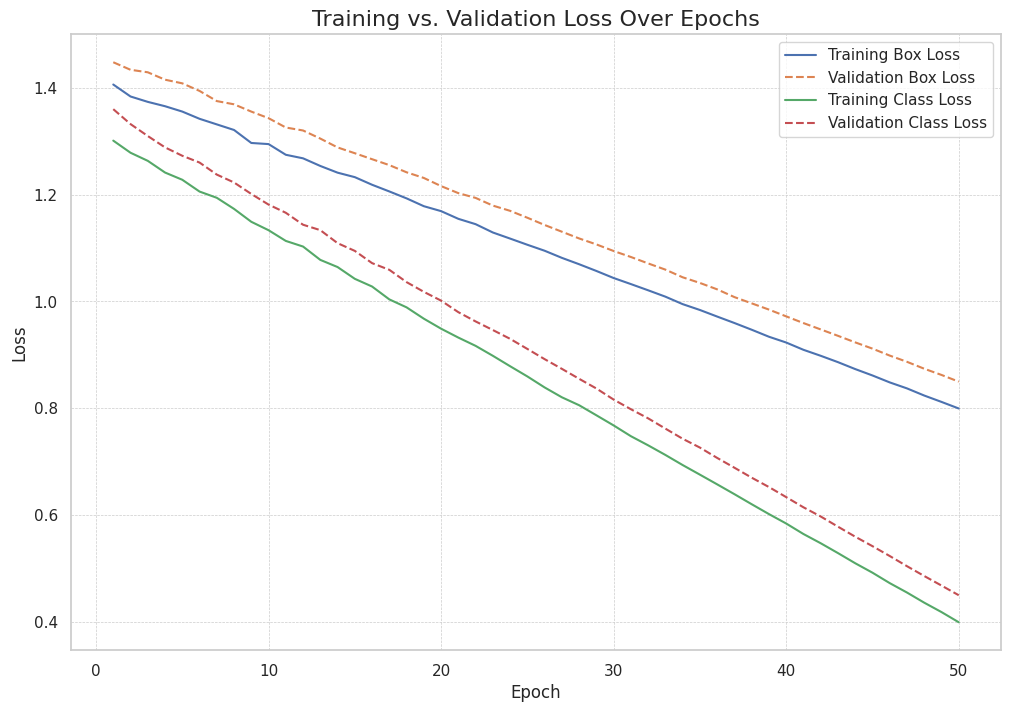

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(style="whitegrid")

df = pd.read_csv('/content/license_plate_runs/V3/results.csv')
df.columns = df.columns.str.strip()

precision = df['metrics/precision(B)']
recall = df['metrics/recall(B)']
df['metrics/f1_score'] = 2 * (precision * recall) / (precision + recall).replace(0, np.nan)


best_metrics = {
    'Precision': df['metrics/precision(B)'].max(),
    'Recall': df['metrics/recall(B)'].max(),
    'F1-Score': df['metrics/f1_score'].max(),
    'mAP@50(Accuracy)': df['metrics/mAP50(B)'].max(),
}

print("--- Best Performance Metrics Across All Epochs ---")
for metric, value in best_metrics.items():
    print(f"Best {metric}: {value:.4f}")
print("-------------------------------------------------")

#(Precision, Recall, mAP, F1)
plt.figure(figsize=(12, 8))
plt.plot(df['epoch'], df['metrics/precision(B)'], label='Precision')
plt.plot(df['epoch'], df['metrics/recall(B)'], label='Recall')
plt.plot(df['epoch'], df['metrics/f1_score'], label='F1-Score', linestyle=':', linewidth=2)
plt.plot(df['epoch'], df['metrics/mAP50(B)'], label='mAP@50')

plt.title('Model Performance Metrics Over Epochs', fontsize=16)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.ylim(0, 1)
plt.savefig('performance_metrics_with_f1.png')


#Training vs. Validation Loss
plt.figure(figsize=(12, 8))

plt.plot(df['epoch'], df['train/box_loss'], label='Training Box Loss')
plt.plot(df['epoch'], df['val/box_loss'], label='Validation Box Loss', linestyle='--')

plt.plot(df['epoch'], df['train/cls_loss'], label='Training Class Loss')
plt.plot(df['epoch'], df['val/cls_loss'], label='Validation Class Loss', linestyle='--')


plt.title('Training vs. Validation Loss Over Epochs', fontsize=16)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.savefig('training_validation_loss.png')

display(Image('/content/license_plate_runs/V3/confusion_matrix.png'))
display(Image('/content/V1/val_batch0_labels.jpg'))

Successfully loaded Run 1 from /content/license_plate_runs/V1/results1.csv
Successfully loaded Run 2 from /content/license_plate_runs/V2/results2.csv
Successfully loaded Run 3 from /content/license_plate_runs/V3/results3.csv


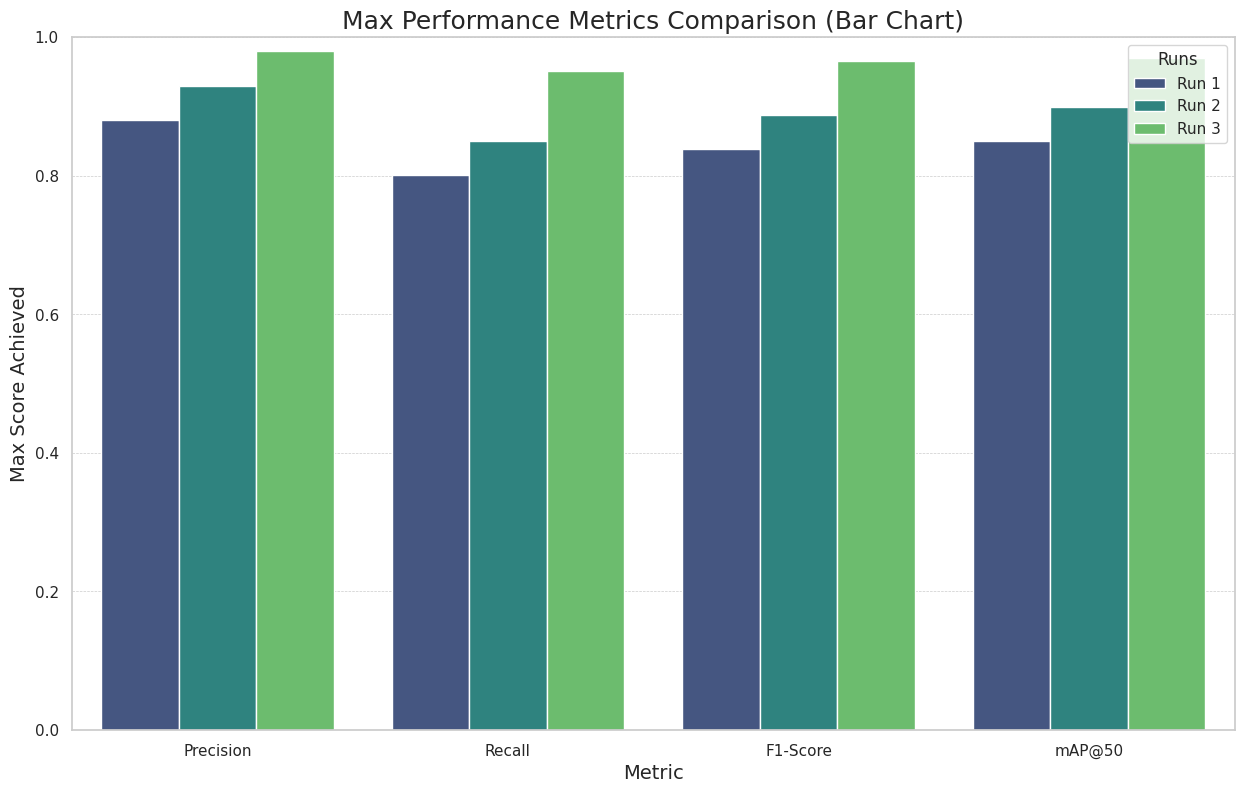

<Figure size 640x480 with 0 Axes>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

sns.set_theme(style="whitegrid")


FILE_PATHS = {
    'Run 1': '/content/license_plate_runs/V1/results1.csv',
    'Run 2': '/content/license_plate_runs/V2/results2.csv',
    'Run 3': '/content/license_plate_runs/V3/results3.csv'
}


all_data = []

for run_name, file_path in FILE_PATHS.items():
    try:
        df = pd.read_csv(file_path)
        df.columns = df.columns.str.strip()

        precision = df['metrics/precision(B)']
        recall = df['metrics/recall(B)']
        df['metrics/f1_score'] = 2 * (precision * recall) / (precision + recall).replace(0, np.nan)

        df['Run'] = run_name
        all_data.append(df)
        print(f"Successfully loaded {run_name} from {file_path}")
    except FileNotFoundError:
        print(f"ERROR: File not found for {run_name} at {file_path}. Skipping run.")
    except KeyError as e:
        print(f"ERROR: Missing expected column {e} in {file_path}. Skipping run.")

if not all_data:
    print("No data loaded. Cannot generate plots.")
    exit()

combined_df = pd.concat(all_data, ignore_index=True)


performance_metrics_cols = [
    'metrics/precision(B)',
    'metrics/recall(B)',
    'metrics/f1_score',
    'metrics/mAP50(B)',
]

summary_df = combined_df.groupby('Run')[performance_metrics_cols].max().reset_index()

summary_df_melted = summary_df.melt(
    id_vars=['Run'],
    value_vars=performance_metrics_cols,
    var_name='Metric',
    value_name='Max_Value'
)

metric_mapping = {
    'metrics/precision(B)': 'Precision',
    'metrics/recall(B)': 'Recall',
    'metrics/f1_score': 'F1-Score',
    'metrics/mAP50(B)': 'mAP@50',
}
summary_df_melted['Metric_Label'] = summary_df_melted['Metric'].map(metric_mapping)



plt.figure(figsize=(15, 9))

sns.barplot(
    data=summary_df_melted,
    x='Metric_Label',
    y='Max_Value',
    hue='Run',
    palette='viridis'
)

plt.title('Max Performance Metrics Comparison (Bar Chart)', fontsize=18)
plt.xlabel('Metric', fontsize=14)
plt.ylabel('Max Score Achieved', fontsize=14)
plt.ylim(0, 1)
plt.legend(title='Runs', loc='upper right')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()
plt.savefig('max_performance_comparison_bar.png')


# The best model is best.pt, trained from Run 3